# https://www.kaggle.com/code/khotijahs1/nlp-financial-news-sentiment-analysis#NLP

In [51]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from gensim.models import Doc2Vec
from tqdm import tqdm

# Read dataset

In [3]:
df = pd.read_csv('./all-data.csv',delimiter=',',encoding='latin-1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [4]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})

In [5]:
df.shape

(4845, 2)

In [6]:
df.index = range(4845)
df['Message'].apply(lambda x: len(x.split(' '))).sum()

111964

# Visualize data set

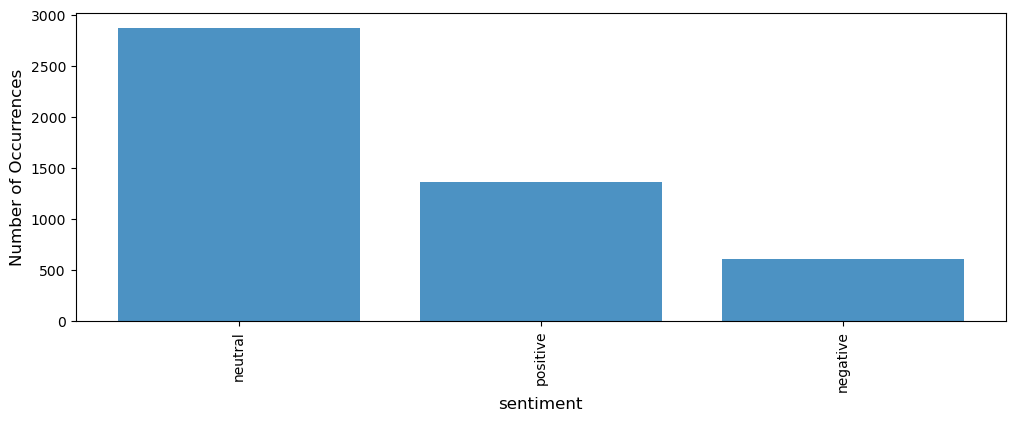

In [33]:
cnt_pro = df['sentiment'].value_counts()
plt.figure(figsize=(12,4))
plt.bar(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [34]:
#Convert sting to numeric
sentiment  = {'positive': 0,'neutral': 1,'negative':2} 

df.sentiment = [sentiment[item] for item in df.sentiment] 
print(df)

      sentiment                                            Message
0             1  Technopolis plans to develop in stages an area...
1             2  The international electronic industry company ...
2             0  With the new production plant the company woul...
3             0  According to the company 's updated strategy f...
4             0  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...         ...                                                ...
4840          2  LONDON MarketWatch -- Share prices ended lower...
4841          1  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842          2  Operating profit fell to EUR 35.4 mn from EUR ...
4843          2  Net sales of the Paper segment decreased to EU...
4844          2  Sales in Finland decreased by 10.5 % in Januar...

[4845 rows x 2 columns]


In [35]:
def print_message(index):
    example = df[df.index == index][['Message', 'sentiment']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(12)

Finnish Talentum reports its operating profit increased to EUR 20.5 mn in 2005 from EUR 9.3 mn in 2004 , and net sales totaled EUR 103.3 mn , up from EUR 96.4 mn .
Message: 0


# Text Preprocessing

we define a function to convert text to lower-case and strip punctuation/symbols from words and so on.

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shinghimho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

In [39]:
df['Message'] = df['Message'].apply(cleanText)
train, test = train_test_split(df, test_size=0.000001 , random_state=42)

In [41]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens

In [49]:
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))
X.shape

Found 4845 unique tokens.


(4845, 71)

In [47]:
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4845, 50)


In [48]:
#train_tagged.values[2173]
train_tagged.values

array([TaggedDocument(words=['upm-kymmene', 'has', 'generated', 'four', 'consecutive', 'quarters', 'of', 'positive', 'free', 'cash', 'flow', '.'], tags=[0]),
       TaggedDocument(words=['in', 'the', 'method', 'the', 'smelt', 'spouts', '2', 'are', 'separated', 'from', 'the', 'working', 'area', '6', 'by', 'a', 'shielding', 'wall', '8', ',', '10', 'arranged', 'movable', 'in', 'relation', 'to', 'the', 'smelt', 'spouts', '.'], tags=[1]),
       TaggedDocument(words=['``', 'that', "'s", 'a', 'very', 'high', 'figure', 'on', 'the', 'european', 'scale', ',', '``', 'noop', 'said', ',', 'recalling', 'however', 'that', 'this', 'also', 'includes', 'beer', 'bought', 'by', 'finnish', 'tourists', '.'], tags=[1]),
       ...,
       TaggedDocument(words=['proha', 'plc', '(', 'euronet', ':7327', ')', 'announced', 'today', '(', '19', 'may', ')', 'that', 'its', 'fully-owned', 'subsidiary', ',', 'safran', 'software', 'solutions', 'as', ',', 'has', 'agreed', 'to', 'sell', 'its', '49', '%', 'share', 'of', '

Model DM = 1

In [52]:
d2v_model = Doc2Vec(dm=1, dm_mean=1, vector_size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 4844/4844 [00:00<00:00, 965738.60it/s]


In [53]:
%%time
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|██████████| 4844/4844 [00:00<00:00, 2474087.75it/s]


CPU times: user 11.8 s, sys: 295 ms, total: 12.1 s
Wall time: 12.9 s


In [57]:
print(d2v_model)

Doc2Vec<dm/m,d20,n5,w8,s0.001>


In [59]:
len(d2v_model.wv.index_to_key)

11682

In [66]:
# Initialize the embedding matrix
embedding_matrix = np.zeros((len(d2v_model.wv.index_to_key) + 1, 20))

# Iterate over the document vectors
for i in range(len(d2v_model.dv)):
    # Assuming you want to store vectors up to the 1000th document
    if i < 1000:
        embedding_matrix[i] = d2v_model.dv[i]

embedding_matrix

array([[-5.52171946, -2.83035231, -8.85192204, ...,  3.28010774,
        -6.7011385 , -6.04938793],
       [ 0.46030089, -0.94013333, -2.35849071, ..., -2.67502594,
         2.73417974,  1.43208838],
       [-0.03294571, -0.66649914, -1.15490949, ...,  2.54438877,
        -9.50087357,  5.57850695],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Measuring distance between two vectors (related to cosine similarity)

In [67]:
d2v_model.wv.most_similar(positive=['profit'], topn=10)

[('loss', 0.9101091027259827),
 ('profits', 0.7888370156288147),
 ('sales', 0.7836297750473022),
 ('income', 0.7682849764823914),
 ('turnover', 0.7466418147087097),
 ('director', 0.7453852295875549),
 ('bill', 0.7197209596633911),
 ('margin', 0.710135817527771),
 ('grid', 0.7084684371948242),
 ('martinez', 0.6889218091964722)]

In [68]:
d2v_model.wv.most_similar(positive=['investment'], topn=10)

[('detailing', 0.7616709470748901),
 ('repayments', 0.7438894510269165),
 ('ais', 0.7403097152709961),
 ('rotation', 0.7284790277481079),
 ('municipality', 0.7268163561820984),
 ('3c', 0.7255566716194153),
 ('ethibel', 0.7180889844894409),
 ('demanded', 0.71148681640625),
 ('property', 0.7077283263206482),
 ('signature', 0.7048186659812927)]

In [69]:
d2v_model.wv.most_similar(positive=['broke'], topn=10)

[('mold', 0.9472445249557495),
 ("'m", 0.8646348714828491),
 ('leaked', 0.8393756747245789),
 ('artemyev', 0.8317275643348694),
 ('tie', 0.8287684917449951),
 ('convinced', 0.8104498386383057),
 ('aptly', 0.8081017732620239),
 ('huh', 0.8070188164710999),
 ('ameas', 0.8033043742179871),
 ('overnight', 0.8009516000747681)]

Plot Similarity word in Doc2vec

/Users/shinghimho/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinghimho/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinghimho/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinghimho/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


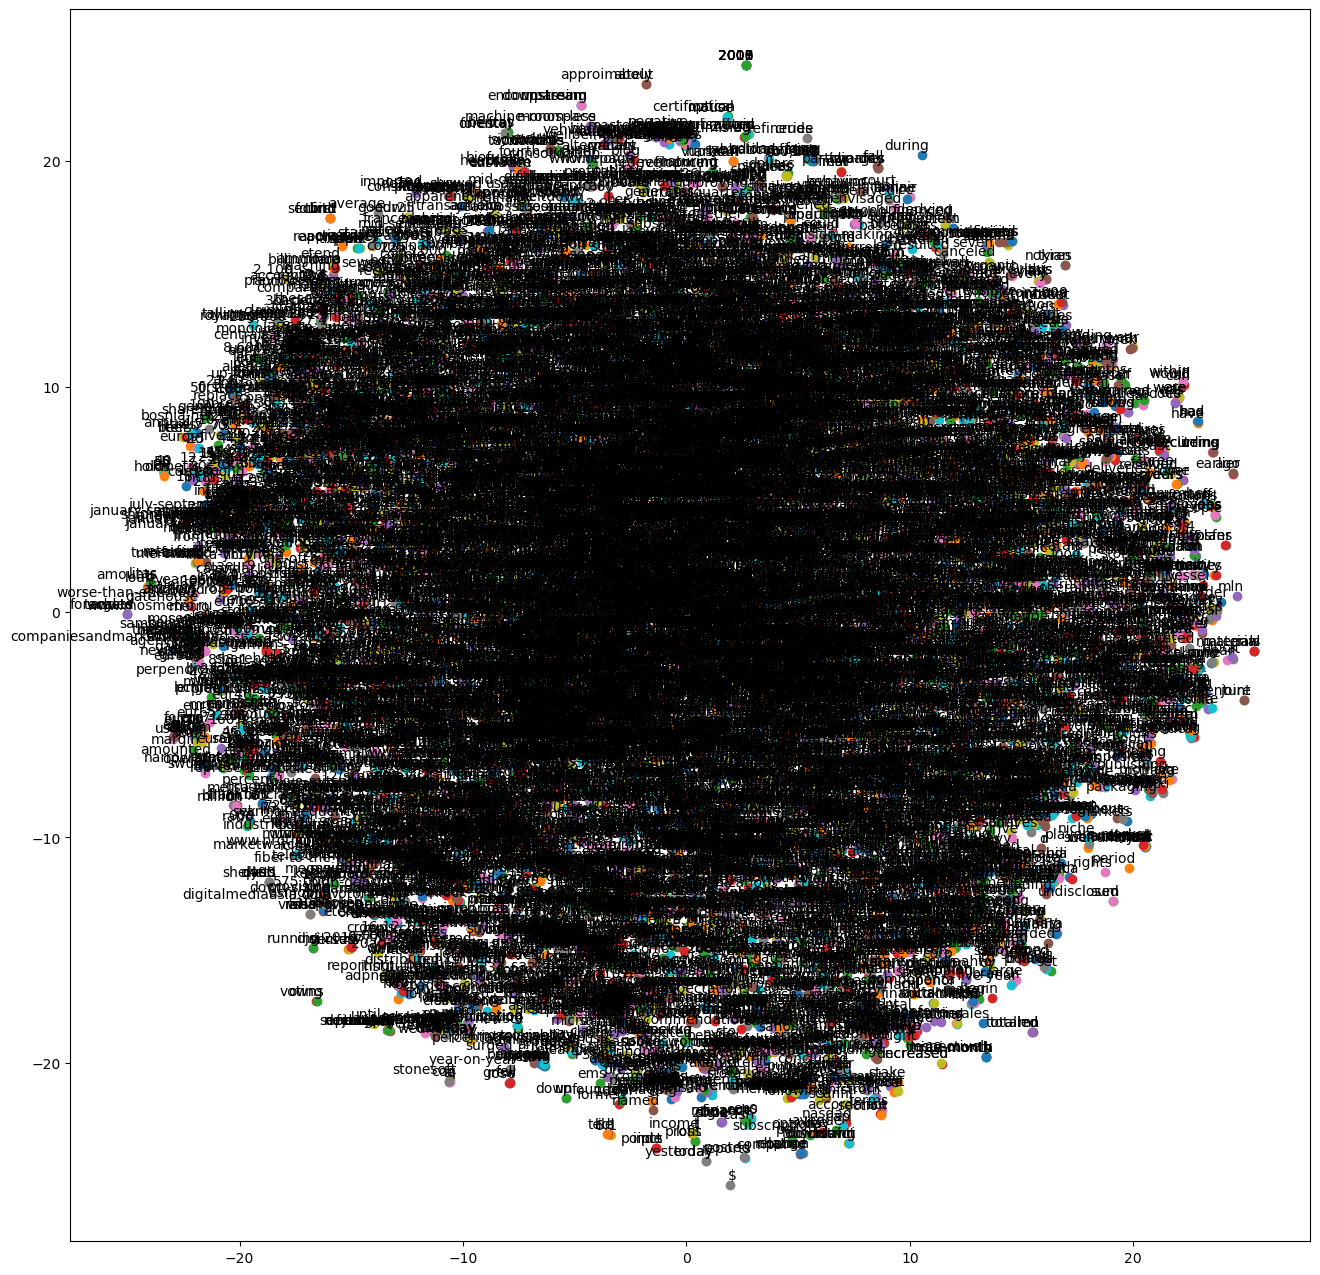

In [76]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)

    # Convert tokens to a numpy array
    tokens_np = np.array(tokens)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(tokens_np)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(d2v_model)


# Create the LSTM Model

In [79]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
import tensorflow as tf

# Initialize the model
model = Sequential()

# Embed word vectors
model.add(Embedding(len(d2v_model.wv.index_to_key) + 1, 20, input_length=X.shape[1], weights=[embedding_matrix], trainable=True))

# Add LSTM layer
model.add(LSTM(50, return_sequences=False))

# Add Dense layer for output
model.add(Dense(3, activation="softmax"))  # Use 'sigmoid' for binary classification

# Output model summary
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['acc'])  # Use 'categorical_crossentropy' for multi-class


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 71, 20)            233660    
                                                                 
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 248013 (968.80 KB)
Trainable params: 248013 (968.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [83]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [84]:
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4118, 71) (4118, 3)
(727, 71) (727, 3)


In [85]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs =50, batch_size=batch_size, verbose = 2)

Epoch 1/50
129/129 - 8s - loss: 0.5500 - acc: 0.5954 - 8s/epoch - 62ms/step
Epoch 2/50
129/129 - 3s - loss: 0.4585 - acc: 0.6741 - 3s/epoch - 27ms/step
Epoch 3/50
129/129 - 4s - loss: 0.3319 - acc: 0.7744 - 4s/epoch - 28ms/step
Epoch 4/50
129/129 - 4s - loss: 0.2516 - acc: 0.8269 - 4s/epoch - 28ms/step
Epoch 5/50
129/129 - 4s - loss: 0.2159 - acc: 0.8465 - 4s/epoch - 28ms/step
Epoch 6/50
129/129 - 3s - loss: 0.1922 - acc: 0.8643 - 3s/epoch - 26ms/step
Epoch 7/50
129/129 - 3s - loss: 0.1632 - acc: 0.8978 - 3s/epoch - 26ms/step
Epoch 8/50
129/129 - 3s - loss: 0.1149 - acc: 0.9388 - 3s/epoch - 25ms/step
Epoch 9/50
129/129 - 3s - loss: 0.0728 - acc: 0.9658 - 3s/epoch - 25ms/step
Epoch 10/50
129/129 - 3s - loss: 0.0506 - acc: 0.9755 - 3s/epoch - 25ms/step
Epoch 11/50
129/129 - 3s - loss: 0.0392 - acc: 0.9813 - 3s/epoch - 26ms/step
Epoch 12/50
129/129 - 3s - loss: 0.0357 - acc: 0.9845 - 3s/epoch - 25ms/step
Epoch 13/50
129/129 - 3s - loss: 0.0263 - acc: 0.9900 - 3s/epoch - 25ms/step
Epoch 14

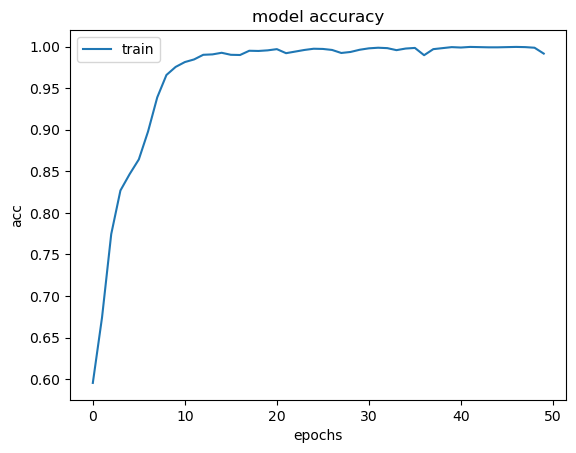

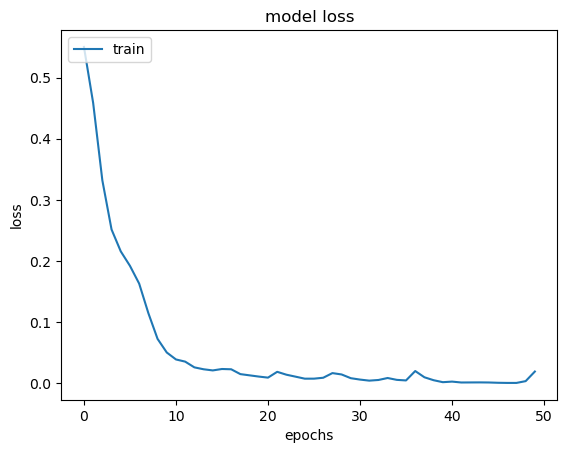

<Figure size 640x480 with 0 Axes>

In [86]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [87]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

129/129 - 2s - loss: 0.0124 - acc: 0.9964 - 2s/epoch - 15ms/step
23/23 - 0s - loss: 1.0540 - acc: 0.6905 - 219ms/epoch - 10ms/step
Train: 0.996, Test: 0.6905


In [90]:
# # predict probabilities for test set
# yhat_probs = model.predict(X_test, verbose=0)
# print(yhat_probs)
# # predict crisp classes for test set
# yhat_classes = model.predict_classes(X_test, verbose=0)
# print(yhat_classes)

# Predict probabilities
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)

# Predict classes
yhat_classes = np.argmax(yhat_probs, axis=1)
print(yhat_classes)


[[1.95582208e-04 9.99797821e-01 6.72907527e-06]
 [9.99999821e-01 1.43179673e-08 9.74170717e-08]
 [2.43301466e-01 7.55622864e-01 1.07559760e-03]
 ...
 [1.00000000e+00 5.18853653e-08 3.67991824e-08]
 [1.30694695e-02 9.86707568e-01 2.22942297e-04]
 [9.99999642e-01 2.39176160e-07 1.73821419e-07]]
[1 0 1 0 1 1 1 1 1 1 1 1 0 2 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 2 1 1 1 2 1 0 2
 0 1 1 0 1 0 1 0 1 1 1 0 1 2 1 0 2 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 2 1 1 0 1 0 1 2 1 1 2 0 0 1 1 2 1 1
 1 2 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 2 1
 0 1 0 0 1 1 1 0 1 1 2 1 1 0 1 0 1 0 1 2 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1
 2 1 0 1 1 1 0 2 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 2 0 0 0 1
 1 1 1 1 1 0 1 1 1 2 0 1 2 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1
 1 0 0 1 0 2 2 2 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 2 1
 1 2 0 1 0 1 1 1 1 0 1 0 1 0 1 2 0 1 0 1 1 1 1 0 1 2 0 1 0 0 1 0 1 1 1 1 1
 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 

In [91]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1,
       0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1,
       0, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0,
       1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1,
       2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0,

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, yhat_classes)
cm

array([[138,  74,   3],
       [ 92, 325,   9],
       [ 21,  26,  39]])

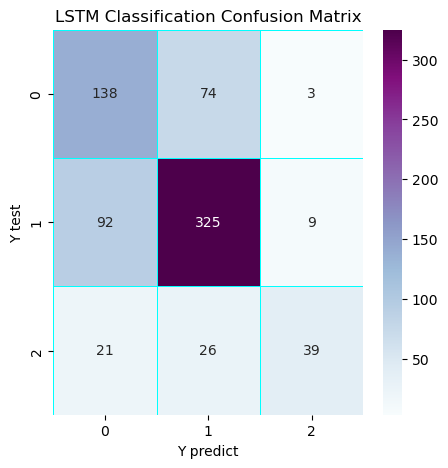

In [93]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Validation

validation_size = 610

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

Save model

In [94]:
model.save('Mymodel.h5')

/Users/shinghimho/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test with new and different data set aside from the data to build the model.

In [95]:
message = ['Congratulations! you have won a $1,000 Walmart gift card']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 54ms/step
[[9.9916339e-01 4.7400862e-04 3.6256469e-04]] 0


In [96]:
message = ['such massive asteroid hit will certainly create new business opportunities']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 59ms/step
[[6.684482e-01 4.858048e-04 3.310659e-01]] 0


In [97]:
message = ['so does anyone else not open Snapchat anymore ? or is it just me ... ugh this so sad.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 48ms/step
[[1.1847983e-08 1.0000000e+00 1.5485758e-08]] 1


In [98]:
message = ['@elonmusk had a terrible experience with a very pushy sales guy from tesla Stanford shop while shopping for model x']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 51ms/step
[[9.9999726e-01 2.2751724e-06 4.2851386e-07]] 0


In [99]:
message = ['The local electronics industry is expected to remain stable amid layoff concerns surrounding Japanese electronics giants operating in the country, an official says.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 45ms/step
[[4.0313523e-07 9.9999952e-01 1.0981676e-07]] 1


In [100]:
message = ['The local electronics industry is amid layoff concerns and last year has laid off tens of employees']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 51ms/step
[[8.8875201e-03 3.1677624e-05 9.9108082e-01]] 2
